In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
dataset.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [13]:
dataset.shape

(200, 5)

In [14]:
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
dataset.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null object
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
dataset.nunique()

CustomerID        200
Gender              2
Age                51
Annual_Income      64
Spending_Score     84
dtype: int64

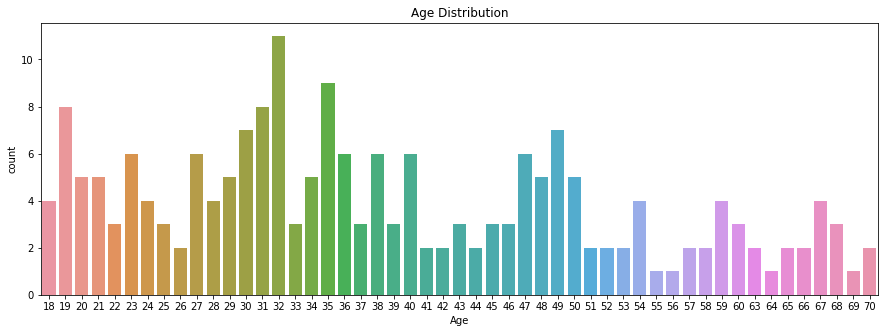

In [18]:
# AGE DISTRIBUTION USING SEABORN
plt.figure(figsize=(15,5))
sns.countplot(dataset['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

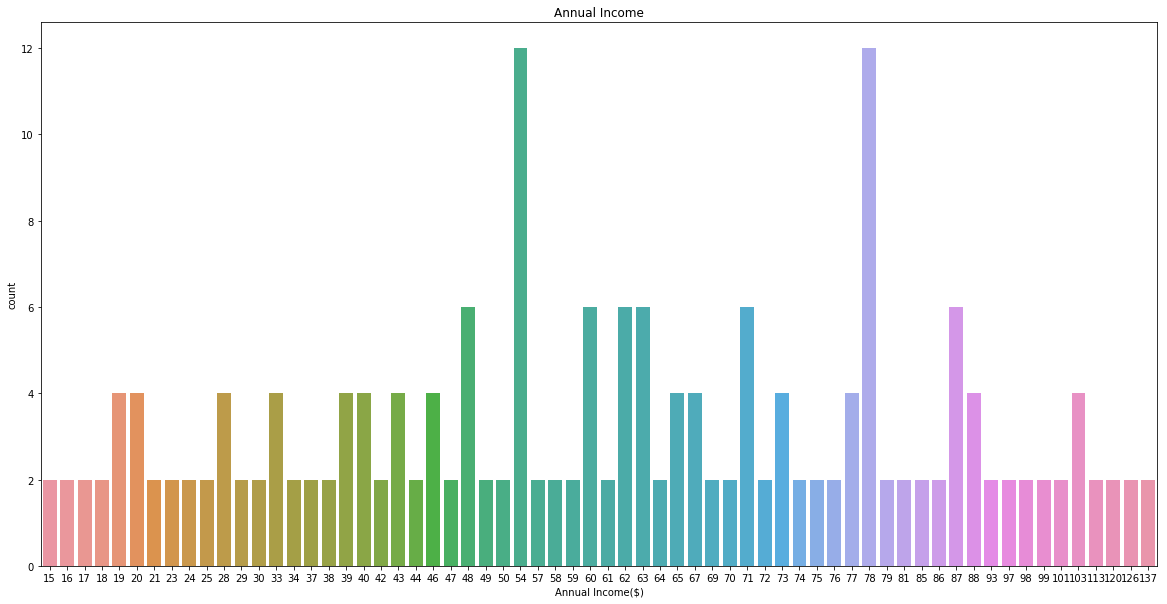

In [19]:
# Annual Income Distribution using seaborn
plt.figure(figsize=(20,10))
sns.countplot(dataset['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show()

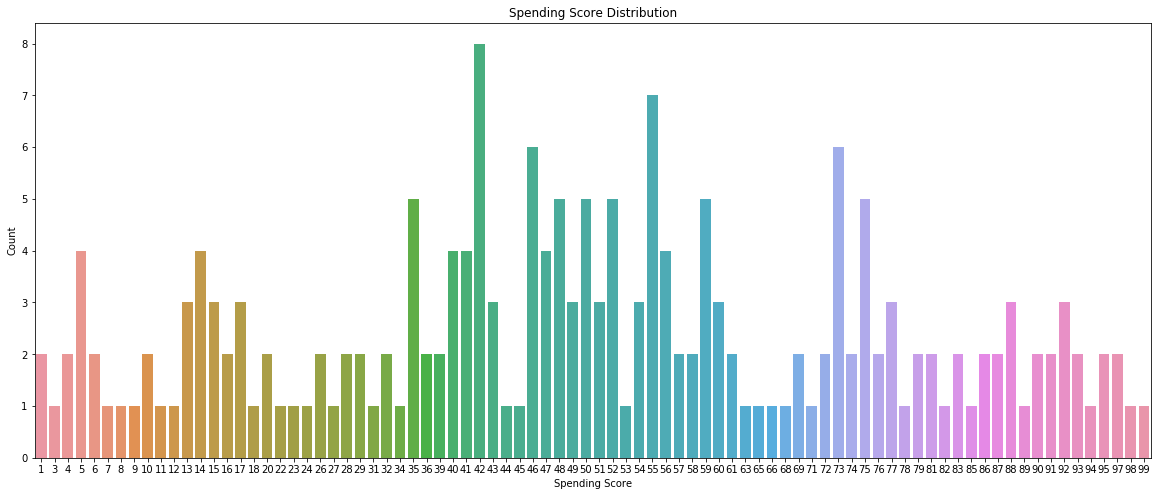

In [20]:
# Data Visualization of Spending Score Distribution
plt.figure(figsize=(20,8))
sns.countplot(dataset['Spending_Score'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.axis()
plt.show()

C:\Users\VAMSHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\VAMSHI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Count')

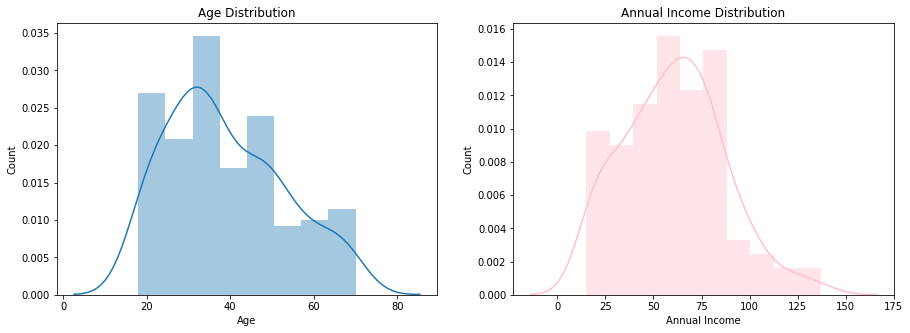

In [21]:
# Distribution Plot for age and Annual Income
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataset['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(dataset['Annual_Income'],color='pink')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

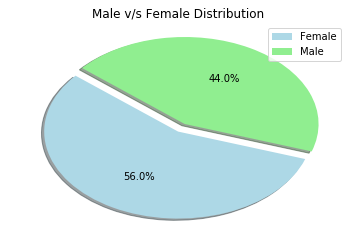

In [22]:
# Gender Distribution test
colors = ['LightBlue','Lightgreen']
explode = [0,0.1]
plt.pie(dataset['Gender'].value_counts(),explode=explode,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male v/s Female Distribution')
plt.axis('off')

In [23]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

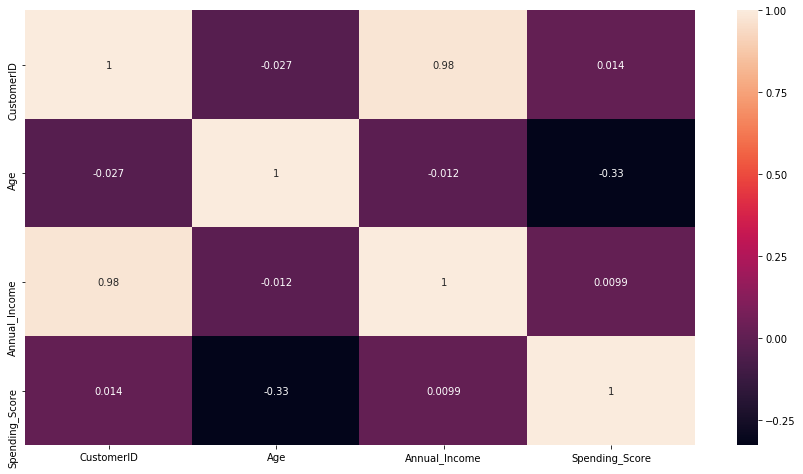

In [24]:
# Heat map for Co related features
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

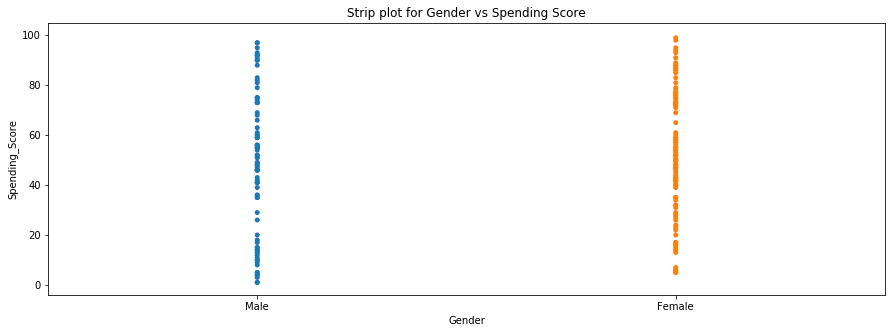

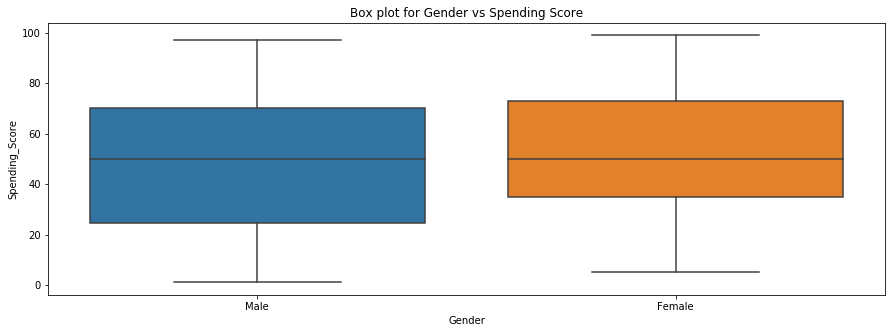

C:\Users\VAMSHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


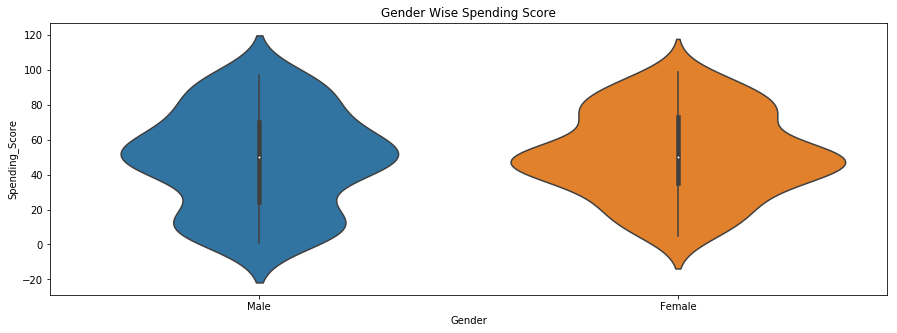

In [25]:
# Plotting of Gender v/s Spending score:
plt.figure(figsize=(15,5))
sns.stripplot(dataset['Gender'], dataset['Spending_Score'])
plt.title('Strip plot for Gender vs Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(dataset['Gender'], dataset['Spending_Score'])
plt.title('Box plot for Gender vs Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(dataset['Gender'],dataset['Spending_Score'])
plt.title('Gender Wise Spending Score')
plt.show()

C:\Users\VAMSHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


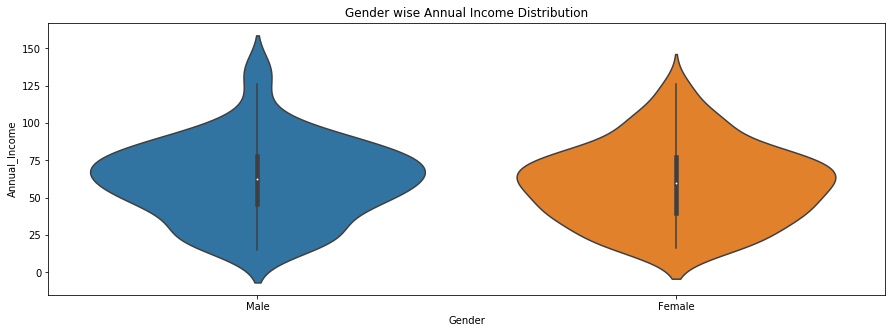

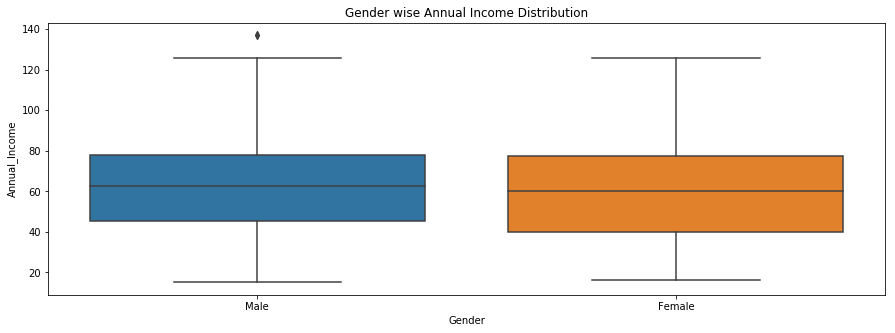

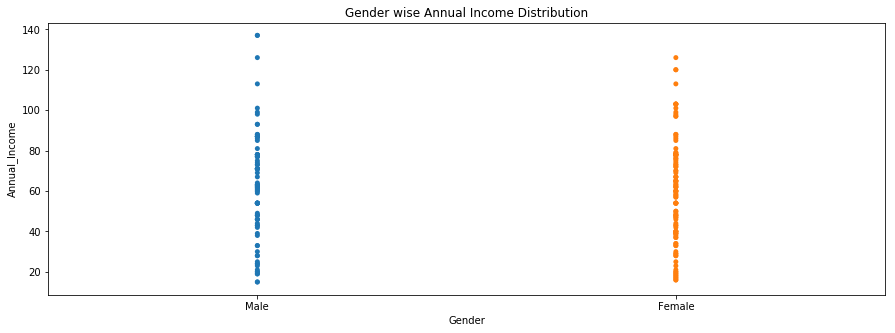

In [27]:
# female domimnation ..... Typical
# Gender v/s Annual Income
plt.figure(figsize=(15,5))
sns.violinplot(dataset['Gender'],dataset['Annual_Income'])
plt.title('Gender wise Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(dataset['Gender'],dataset['Annual_Income'])
plt.title('Gender wise Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.stripplot(dataset['Gender'],dataset['Annual_Income'])
plt.title('Gender wise Annual Income Distribution')
plt.show()

In [28]:
# Cluster Analysis
# Segementation using Age and Annual_Income
x = dataset.loc[:,['Age' , 'Annual_Income']].values

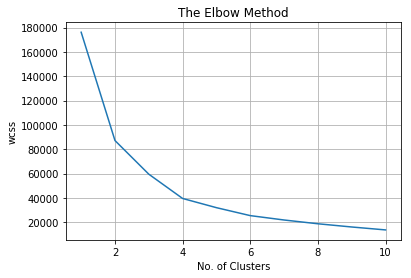

In [29]:
from sklearn.cluster import KMeans

wcss =[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

In [30]:
#Applying K Means 

kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0,algorithm='elkan')
y_means = kmeans.fit_predict(x)

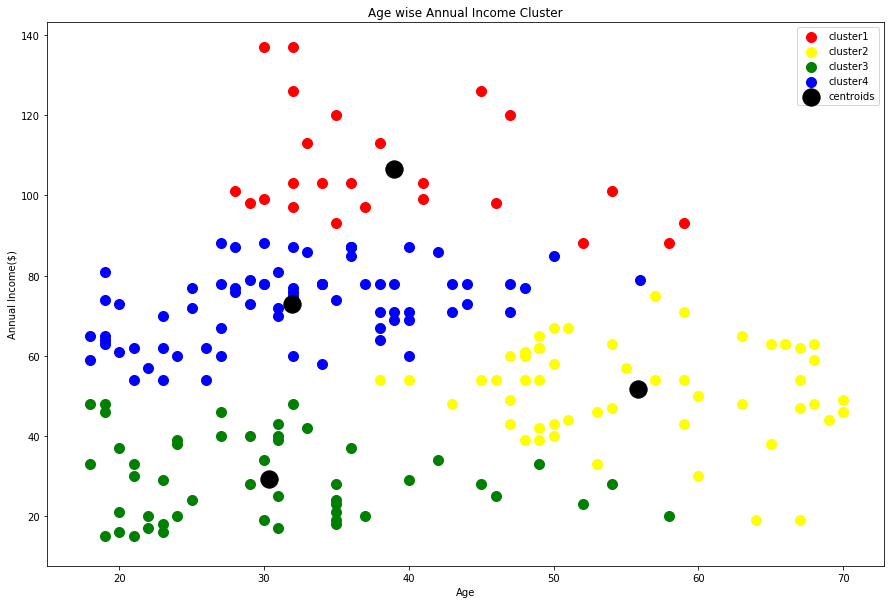

In [31]:
#Visualizing
plt.figure(figsize=(15,10))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='blue',label='cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='centroids')
plt.title('Age wise Annual Income Cluster')
plt.xlabel('Age')
plt.ylabel('Annual Income($)')
plt.legend()
plt.show()

In [32]:
x1 = dataset.loc[:,['Age','Spending_Score']].values

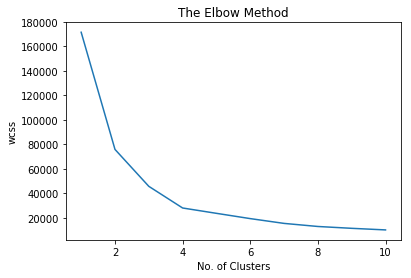

In [33]:
from sklearn.cluster import KMeans

wcss =[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
# K Means Clustering for Age V/S Spending Score
#Applying K Means 

kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means = kmeans.fit_predict(x1)

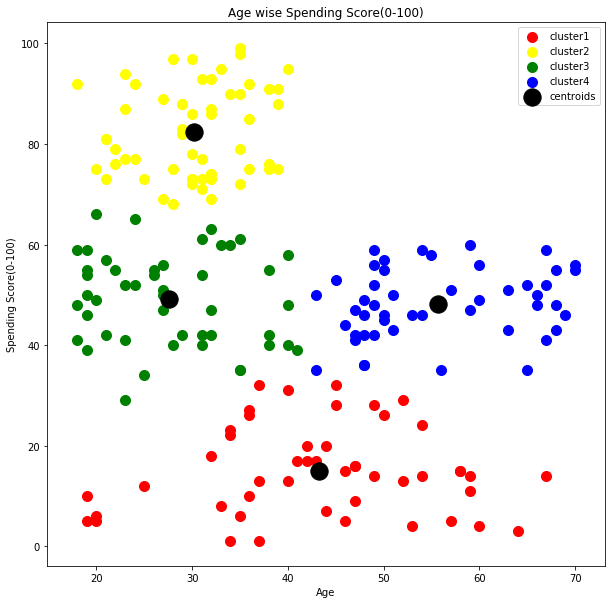

In [35]:
#Visualizing
plt.figure(figsize=(10,10))
plt.scatter(x1[y_means==0,0],x1[y_means==0,1],s=100,c='red',label='cluster1')
plt.scatter(x1[y_means==1,0],x1[y_means==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(x1[y_means==2,0],x1[y_means==2,1],s=100,c='green',label='cluster3')
plt.scatter(x1[y_means==3,0],x1[y_means==3,1],s=100,c='blue',label='cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='centroids')
plt.title('Age wise Spending Score(0-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score(0-100)')
plt.legend()

In [36]:
# Clustering based on Annual Income v/s Spending Score
#Feature Selection for Annual Income and Spending Score
x2 = dataset.loc[:,['Annual_Income','Spending_Score']].values

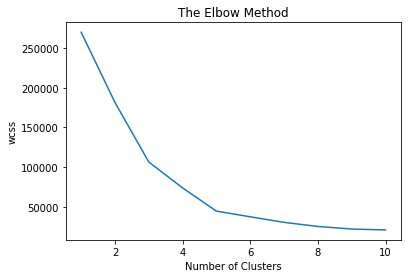

In [37]:
from sklearn.cluster import KMeans

wcss =[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [38]:
# If we zoom the plot above , optimal clusters comes to 5, so we will take it n_clusters as 5 here.
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x2)

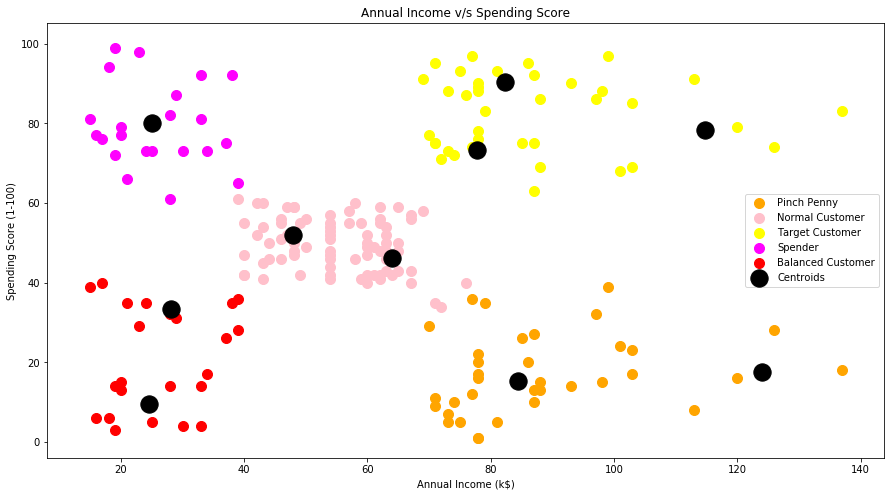

In [39]:
#Visualizing all the clusters 

plt.figure(figsize=(15,8))
plt.scatter(x2[y_kmeans == 0, 0], x2[y_kmeans == 0, 1], s = 100, c = 'Orange', label = 'Pinch Penny')
plt.scatter(x2[y_kmeans == 1, 0], x2[y_kmeans == 1, 1], s = 100, c = 'Pink', label = 'Normal Customer')
plt.scatter(x2[y_kmeans == 2, 0], x2[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Target Customer')
plt.scatter(x2[y_kmeans == 3, 0], x2[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Spender')
plt.scatter(x2[y_kmeans == 4, 0], x2[y_kmeans == 4, 1], s = 100, c = 'Red', label = 'Balanced Customer')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Black', label = 'Centroids')
plt.title('Annual Income v/s Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()